# Requirements

In [1]:
!pip install tensorflow keras

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for Bitcoin. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- symbol - the resource for prediction
- open - the open price of BTC
- high - the high price of BTC
- low - the low price of BTC
- volumeBTC - the volume of trades BTC
- volumeUSD - the volume of trades USD
- close - the close price of BTC

Target:
close

Load the dataset into a `pandas` data frame.

In [25]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('../datasets/BTC-Daily.csv')
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


Explore the dataset using visualizations of your choice.

In [26]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2651 non-null   datetime64[ns]
 1   symbol      2651 non-null   object        
 2   open        2651 non-null   float64       
 3   high        2651 non-null   float64       
 4   low         2651 non-null   float64       
 5   close       2651 non-null   float64       
 6   Volume BTC  2651 non-null   float64       
 7   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 165.8+ KB


In [27]:
df['symbol'].unique()

array(['BTC/USD'], dtype=object)

In [28]:
df.drop(['symbol'],axis=1,inplace=True)

<Axes: >

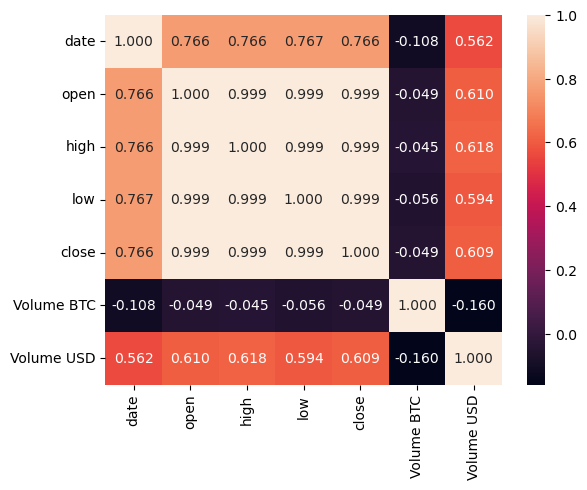

In [29]:
# Write your code here. Add as many boxes as you need.
sns.heatmap(df.corr(),annot=True,fmt='.3f')

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [30]:
# Write your code here. Add as many boxes as you need.
lag = 7
periods = range(lag,0,-1)

In [31]:
df_lag = df.shift(periods)
df = pd.concat([df,df_lag],axis=1)
df

,date,open,high,low,close,Volume BTC,Volume USD,date_7,open_7,high_7,...,close_2,Volume BTC_2,Volume USD_2,date_1,open_1,high_1,low_1,close_1,Volume BTC_1,Volume USD_1
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06,NaT,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08,NaT,NaN,NaN,...,NaN,NaN,NaN,2022-03-01,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,NaT,NaN,NaN,...,43185.48,4.900629e+01,2.116360e+06,2022-02-28,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,NaT,NaN,NaN,...,43178.98,3.160618e+03,1.364723e+08,2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,NaT,NaN,NaN,...,37712.68,1.701817e+03,6.418008e+07,2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,2014-12-09,364.61,365.48,...,365.20,3.297896e+06,8.865090e+03,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06,7.908290e+03
2647,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,2014-12-08,376.87,377.45,...,376.67,2.998358e+06,7.908290e+03,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2648,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,2014-12-07,375.07,377.50,...,379.25,2.593576e+06,6.832530e+03,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2649,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,2014-12-06,374.95,376.99,...,378.39,2.520662e+06,6.660560e+03,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03


In [32]:
df.dropna(axis=0,inplace=True)
df.head()

,date,open,high,low,close,Volume BTC,Volume USD,date_7,open_7,high_7,...,close_2,Volume BTC_2,Volume USD_2,date_1,open_1,high_1,low_1,close_1,Volume BTC_1,Volume USD_1
7,2022-02-22,37036.98,38463.88,36368.99,38269.94,2388.759035,9.141766e+07,2022-03-01,43221.71,43626.49,...,38376.88,6302.850957,2.418838e+08,2022-02-23,38269.94,39303.24,37060.16,37274.18,1778.275258,6.628375e+07
8,2022-02-21,38384.09,39494.11,36810.72,37076.60,3501.420364,1.298208e+08,2022-02-28,37717.10,44256.08,...,37274.18,1778.275258,6.628375e+07,2022-02-22,37036.98,38463.88,36368.99,38269.94,2388.759035,9.141766e+07
9,2022-02-20,40108.62,40151.62,37974.18,38373.90,1283.511547,4.925334e+07,2022-02-27,39146.66,39886.92,...,38269.94,2388.759035,9.141766e+07,2022-02-21,38384.09,39494.11,36810.72,37076.60,3501.420364,1.298208e+08
10,2022-02-19,40008.75,40471.27,39587.08,40109.02,695.654296,2.790201e+07,2022-02-26,39242.64,40330.99,...,37076.60,3501.420364,1.298208e+08,2022-02-20,40108.62,40151.62,37974.18,38373.90,1283.511547,4.925334e+07
11,2022-02-18,40532.66,40996.31,39450.00,39996.99,2212.714920,8.850194e+07,2022-02-25,38360.93,39727.97,...,38373.90,1283.511547,4.925334e+07,2022-02-19,40008.75,40471.27,39587.08,40109.02,695.654296,2.790201e+07


In [33]:
drop_dates = ['date','date_1','date_2','date_3','date_4','date_5','date_6','date_7']
df.drop(drop_dates,axis=1,inplace=True)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [34]:
# Write your code here. Add as many boxes as you need.
X = df.drop(['close'],axis=1)
y = df['close']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [36]:
X_train.shape[1] // 7

6

In [37]:
X_train.columns

Index(['open', 'high', 'low', 'Volume BTC', 'Volume USD', 'open_7', 'high_7',
       'low_7', 'close_7', 'Volume BTC_7', 'Volume USD_7', 'open_6', 'high_6',
       'low_6', 'close_6', 'Volume BTC_6', 'Volume USD_6', 'open_5', 'high_5',
       'low_5', 'close_5', 'Volume BTC_5', 'Volume USD_5', 'open_4', 'high_4',
       'low_4', 'close_4', 'Volume BTC_4', 'Volume USD_4', 'open_3', 'high_3',
       'low_3', 'close_3', 'Volume BTC_3', 'Volume USD_3', 'open_2', 'high_2',
       'low_2', 'close_2', 'Volume BTC_2', 'Volume USD_2', 'open_1', 'high_1',
       'low_1', 'close_1', 'Volume BTC_1', 'Volume USD_1'],
      dtype='object')

In [38]:
X_train.drop(['open','high','low','Volume BTC','Volume USD'],axis=1,inplace=True)
X_train

,open_7,high_7,low_7,close_7,Volume BTC_7,Volume USD_7,open_6,high_6,low_6,close_6,...,low_2,close_2,Volume BTC_2,Volume USD_2,open_1,high_1,low_1,close_1,Volume BTC_1,Volume USD_1
7,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06,37717.10,44256.08,37468.99,43178.98,...,34324.05,38376.88,6.302851e+03,2.418838e+08,38269.94,39303.24,37060.16,37274.18,1.778275e+03,6.628375e+07
8,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08,39146.66,39886.92,37015.74,37712.68,...,37060.16,37274.18,1.778275e+03,6.628375e+07,37036.98,38463.88,36368.99,38269.94,2.388759e+03,9.141766e+07
9,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,39242.64,40330.99,38600.00,39146.66,...,36368.99,38269.94,2.388759e+03,9.141766e+07,38384.09,39494.11,36810.72,37076.60,3.501420e+03,1.298208e+08
10,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,38360.93,39727.97,38027.61,39231.64,...,36810.72,37076.60,3.501420e+03,1.298208e+08,40108.62,40151.62,37974.18,38373.90,1.283512e+03,4.925334e+07
11,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,37253.26,39720.00,34324.05,38376.88,...,37974.18,38373.90,1.283512e+03,4.925334e+07,40008.75,40471.27,39587.08,40109.02,6.956543e+02,2.790201e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,442.84,443.98,435.28,442.84,8.415768e+05,1.909660e+03,436.30,444.41,435.06,441.97,...,451.11,455.56,1.401094e+06,3.075400e+03,456.30,458.08,454.72,457.48,7.303937e+05,1.599700e+03
2118,436.30,444.41,435.06,441.97,1.505886e+06,3.414130e+03,452.47,453.85,441.05,441.63,...,454.72,457.48,7.303937e+05,1.599700e+03,456.42,457.25,453.51,455.38,6.128071e+05,1.344330e+03
2119,452.47,453.85,441.05,441.63,2.450585e+06,5.466730e+03,452.96,455.68,452.01,452.94,...,453.51,455.38,6.128071e+05,1.344330e+03,455.20,456.82,452.04,456.04,1.282635e+06,2.819700e+03
2120,452.96,455.68,452.01,452.94,1.175479e+06,2.588670e+03,454.00,456.09,452.14,453.01,...,452.04,456.04,1.282635e+06,2.819700e+03,452.95,455.09,448.88,454.92,1.538457e+06,3.404270e+03


In [39]:
X_test.drop(['open','high','low','Volume BTC','Volume USD'],axis=1,inplace=True)
X_test

,open_7,high_7,low_7,close_7,Volume BTC_7,Volume USD_7,open_6,high_6,low_6,close_6,...,low_2,close_2,Volume BTC_2,Volume USD_2,open_1,high_1,low_1,close_1,Volume BTC_1,Volume USD_1
2122,457.56,458.00,451.11,455.56,1401093.82,3075.40,456.30,458.08,454.72,457.48,...,450.32,452.01,1517420.38,3344.72,461.49,463.00,447.38,449.91,2571495.49,5664.75
2123,456.30,458.08,454.72,457.48,730393.65,1599.70,456.42,457.25,453.51,455.38,...,447.38,449.91,2571495.49,5664.75,457.75,464.79,455.62,461.63,1617041.39,3517.48
2124,456.42,457.25,453.51,455.38,612807.08,1344.33,455.20,456.82,452.04,456.04,...,455.62,461.63,1617041.39,3517.48,458.97,459.69,455.95,457.81,591905.16,1294.05
2125,455.20,456.82,452.04,456.04,1282634.69,2819.70,452.95,455.09,448.88,454.92,...,455.95,457.81,591905.16,1294.05,458.98,461.00,455.95,458.15,911630.56,1989.03
2126,452.95,455.09,448.88,454.92,1538456.69,3404.27,450.88,457.99,450.32,452.01,...,455.95,458.15,911630.56,1989.03,448.50,463.97,447.03,459.73,2508091.25,5517.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,364.61,365.48,343.97,350.49,7376463.45,20940.84,376.87,377.45,364.60,364.61,...,360.01,365.20,3297896.46,8865.09,379.25,383.00,374.23,376.67,2998357.92,7908.29
2647,376.87,377.45,364.60,364.61,3655238.40,9920.84,375.07,377.50,373.16,376.87,...,374.23,376.67,2998357.92,7908.29,378.39,382.86,375.23,379.25,2593576.46,6832.53
2648,375.07,377.50,373.16,376.87,913715.62,2429.62,374.95,376.99,371.31,375.07,...,375.23,379.25,2593576.46,6832.53,376.40,382.31,373.03,378.39,2520662.37,6660.56
2649,374.95,376.99,371.31,375.07,861748.71,2300.21,365.20,377.89,363.99,374.95,...,373.03,378.39,2520662.37,6660.56,376.57,381.99,373.32,373.34,1145566.61,3046.33


## Neural Networks

Create an LSTM model and train it using the `train` function.

In [40]:
X_train.shape

(2115, 42)

In [42]:
# Write your code here. Add as many boxes as you need.
model = Sequential()

In [43]:
model.add(Input(shape=(X_train.shape[1],1)))
model.add(LSTM(units=16, activation='relu', return_sequences=True))
model.add(LSTM(units=32, activation='relu'))
model.add(Dense(units=1))

In [44]:
sequence_length = 7  # Days in a sequence
num_features = 47 // sequence_length  # Features per time step

X_train_reshaped = X_train.values.reshape(-1, sequence_length, num_features)

# Print the new shape
print("Reshaped X_train shape:", X_train_reshaped.shape)

Reshaped X_train shape: (2115, 7, 6)


In [45]:
model.compile(optimizer='adam', loss='mse')

In [46]:
history = history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 119236362240.0000
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 23399753728.0000
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 11959226368.0000
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8310610944.0000
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2984652288.0000
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8967225344.0000
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2696898048.0000
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1552053248.0000
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3213306624.0000
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 65002668032.0000
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 54345609216.0000
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6668651520.0000
Epoch 13/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2092236032.0000
Epoch 14/20
67/

Use the trained model to make predictions for the test set.

In [47]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [48]:
# Write your code here. Add as many boxes as you need.
print(f'R2 Score:{r2_score(y_test,y_pred)}')
print(f'MAE Score:{mean_absolute_error(y_test,y_pred)}')
print(f'RSE Score:{mean_squared_error(y_test,y_pred)}')

R2 Score:-14.934120702032729
MAE Score:312.6729945682054
RSE Score:104310.65915784451


# Additional Bonus Task

Group the data by month. You can use [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function.

Create an LSTM model to predict the 'close' price on a montly frequency.